## 1、前言
支持向量机（Support Vector Machine，SVM）是一个非常优雅的算法，具有非常完善的数学理论，常用于数据分类，也可以用于数据的回归预测中，由于其其优美的理论保证和利用核函数对于线性不可分问题的处理技巧，在上世纪90年代左右，SVM曾红极一时。

本文将不涉及非常严格和复杂的理论知识，力求于通过直觉来感受 SVM。

## 2、 学习目标
- 了解支持向量机的分类标准；
- 了解支持向量机的软间隔分类；
- 了解支持向量机的非线性核函数分类；


## 3、 代码流程

* Demo实践
* * Step1:库函数导入
* * Step2:构建数据集并进行模型训练
* * Step3:模型参数查看
* * Step4:模型预测
* * Step5:模型可视化

## 4、 算法实战

### 4.1 Demo实践

首先我们利用sklearn直接调用 SVM函数进行实践尝试

#### Step1 函数库导入

In [1]:
# 基础函数库
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

/home/crj/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/crj/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/crj/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


#### Step2 构建数据集并进行模型训练

In [3]:
## Demo演示LogisticRegression分类

##构建数据集
x_features = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0,0,0,1,1,1])

## 调用SVC模型（支持向量机分类分类）
svc = svm.SVC(kernel='linear')

svc.fit(x_features,y_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Step3 模型参数查看

In [6]:
## 查看其对应的w
print('the weight of Logistic Regression:',svc.coef_)

## 查看其对应的w0
print('the intersept(w0) of Logistic Regression:',svc.intercept_)


the weight of Logistic Regression: [[0.33364706 0.33270588]]
the intersept(w0) of Logistic Regression: [-0.00031373]


#### Step4 模型预测

In [8]:
y_train_pred = svc.predict(x_features)
print('the prediction result:', y_train_pred)

the prediction result: [0 0 0 1 1 1]


#### Step5 模型可视化
由于我们在这里使用的是线性核函数，所以我们可以将svm进行可视化

In [12]:
# 最佳函数
x_range = np.linspace(-3,3)
w = svc.coef_[0]
a = -w[0] / w[1]
y_3 = a*x_range - (svc.intercept_[0])/w[1]

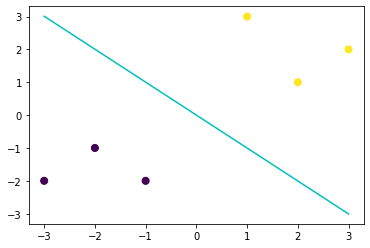

In [22]:
# 可视化决策边界
plt.figure()
plt.scatter(x_features[:,0], x_features[:,1],c=y_label, s=50, cmap = 'viridis')
plt.plot(x_range,y_3,'-c')
plt.show()

可以对照之前的逻辑回归模型的决策边界，我们可以发现两个决策边界是有一定差异的（可以对比两者在X,Y轴上的截距），这说明这两个不同在相同数据集上找到的判别线是不同的，而这不同的原因其实是由于两者选择的最优目标是不一致的。接下来我们进行SVM的一些简单介绍。

## 5、支持向量机
### 5.1、支持向量机介绍

我们常常会碰到这样的一个问题，首先给你一些分属于两个类别的数据

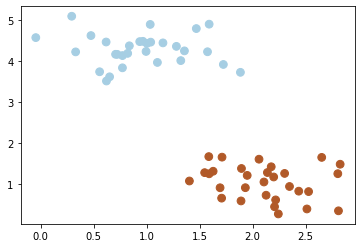

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:,0],X[:,1],c=y, s=60, cmap=plt.cm.Paired)

现在需要一个线性分类器，将这些数据分开来。

我们可能会有多种分法：

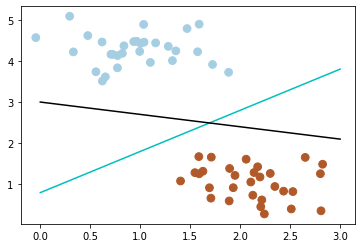

In [32]:
X,y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:,0],X[:,1],c=y, s=60, cmap=plt.cm.Paired)

x_fit = np.linspace(0,3)
y_1 = 1*x_fit +0.8
plt.plot(x_fit,y_1, '-c')
y_2 = -0.3*x_fit+3
plt.plot(x_fit,y_2, '-k')

那么现在有一个问题，两个分类器，哪一个更好呢？

为了判断好坏，我们需要引入一个准则：**好的分类器不仅仅是能够很好的分开已有的数据集，还能对未知数据集进行两个的划分。**

假设，现在有一个属于红色数据点的新数据（3， 2.8）

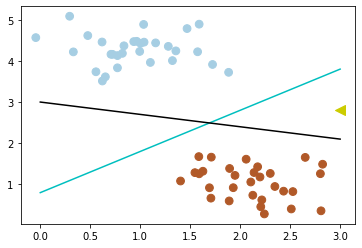

In [33]:
X,y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:,0],X[:,1],c=y, s=60, cmap=plt.cm.Paired)
plt.scatter([3],[2.8],c='#cccc00', marker='<', s=100, cmap=plt.cm.Paired)

x_fit = np.linspace(0,3)
y_1 = 1*x_fit +0.8
plt.plot(x_fit,y_1, '-c')
y_2 = -0.3*x_fit+3
plt.plot(x_fit,y_2, '-k')

可以看到，此时黑色的线会把这个新的数据集分错，而蓝色的线不会。

我们刚刚举的例子可能会带有一些主观性。

那么如何客观的评判两条线的健壮性呢？

此时，我们需要引入一个非常重要的概念：**最大间隔**。

最大间隔刻画着当前分类器与数据集的边界，以这两个分类器为例：

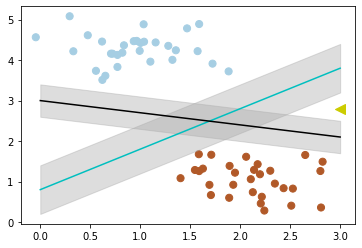

In [35]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plt.scatter([3],[2.8],c='#cccc00', marker='<', s=100, cmap=plt.cm.Paired)
x_fit = np.linspace(0, 3)

# 画函数
y_1 = 1 * x_fit + 0.8
plt.plot(x_fit, y_1, '-c')
# 画边距
plt.fill_between(x_fit, y_1 - 0.6, y_1 + 0.6, edgecolor='none', color='#AAAAAA', alpha=0.4)

y_2 = -0.3 * x_fit + 3
plt.plot(x_fit, y_2, '-k')
plt.fill_between(x_fit, y_2 - 0.4, y_2 + 0.4, edgecolor='none', color='#AAAAAA', alpha=0.4)


可以看到， 蓝色的线最大间隔是大于黑色的线的。

所以我们会选择蓝色的线作为我们的分类器。

那么，我们现在的分类器是最优分类器吗？

或者说，有没有更好的分类器，它具有更大的间隔？

答案是有的。

为了找出最优分类器，我们需要引入我们今天的主角：SVM

In [36]:
from sklearn import svm
# SVM函数
clf = svm.SVC(kernel='linear')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
# 最佳函数
w = clf.coef_[0]
a = -w[0]/w[1]
x_fit = np.linspace(0,3)
y_3 = a*x_fit - (clf.intercept_[0]) / w[1]

# 最大边距 下界
b_down = clf.support_vectors_[0]
y_down = a*x_fit + b_down[1] - a*b_down[0]

# 最大边距 上界
b_up = clf.support_vectors_[-1]
y_up = a*x_fit + b_up[1] - a*b_up[0]



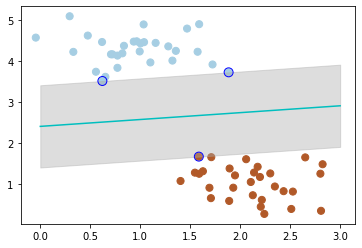

In [50]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
x_fit = np.linspace(0, 3)

plt.plot(x_fit,y_3, '-c')

#画边距
plt.fill_between(x_fit, y_down, y_up, edgecolor='none',color='#AAAAAA', alpha=0.4)

#画支持向量
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],s=80,
           edgecolor='b', facecolors='none')

带黑边的点是距离当前分类器最近的点，我们称之为**支持向量**。

支持向量机为我们提供了在众多可能的分类器之间进行选择的原则，从而确保对未知数据集具有更高的泛化性。

### 5.2 软间隔

但很多时候，我们拿到的数据是这样子的

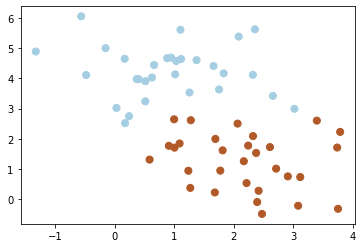

In [52]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

这种情况并不容易找到这样的最大间隔。

于是我们就有了软间隔，相比于硬间隔而言，我们允许个别数据出现在间隔带中。

我们知道，如果没有一个原则进行约束，满足软间隔的分类器也会出现很多条。

所以需要对分错的数据进行惩罚，SVC 函数中，有一个参数 C 就是惩罚参数。

惩罚参数越小，容忍性就越大。

以 C=1 为例子，比如说：

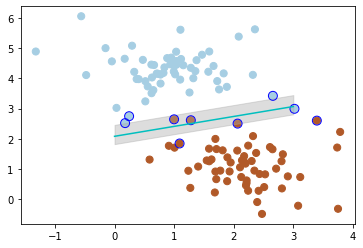

In [57]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
#惩罚参数：C=1
clf = svm.SVC(C=1, kernel='linear')
clf.fit(X,y)

# 最佳函数
w = clf.coef_[0]
a = -w[0]/w[1]
x_fit = np.linspace(0,3)
y_3 = a*x_fit - (clf.intercept_[0]) / w[1]

# 最大边距 下界
b_down = clf.support_vectors_[0]
y_down = a*x_fit + b_down[1] - a*b_down[0]

# 最大边距 上界
b_up = clf.support_vectors_[-1]
y_up = a*x_fit + b_up[1] - a*b_up[0]

# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plt.plot(x_fit,y_3, '-c')

#画边距
plt.fill_between(x_fit, y_down, y_up, edgecolor='none',color='#AAAAAA', alpha=0.4)

#画支持向量
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],s=80,
           edgecolor='b', facecolors='none')

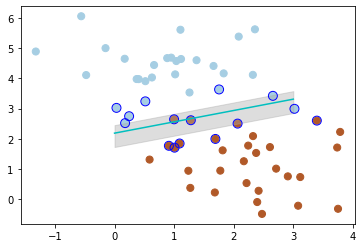

In [58]:
# 画散点图
X, y = make_blobs(n_samples=60, centers=2, random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
#惩罚参数：C=0.2
clf = svm.SVC(C=0.2, kernel='linear')
clf.fit(X,y)

# 最佳函数
w = clf.coef_[0]
a = -w[0]/w[1]
x_fit = np.linspace(0,3)
y_3 = a*x_fit - (clf.intercept_[0]) / w[1]

# 最大边距 下界
b_down = clf.support_vectors_[0]
y_down = a*x_fit + b_down[1] - a*b_down[0]

# 最大边距 上界
b_up = clf.support_vectors_[-1]
y_up = a*x_fit + b_up[1] - a*b_up[0]


plt.plot(x_fit,y_3, '-c')

#画边距
plt.fill_between(x_fit, y_down, y_up, edgecolor='none',color='#AAAAAA', alpha=0.4)

#画支持向量
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],s=80,
           edgecolor='b', facecolors='none')

### 5.3 超平面
如果我们遇到这样的数据集，没有办法利用线性分类起进行分类

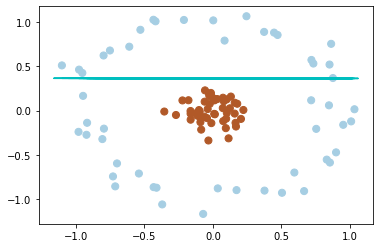

In [62]:
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(100,factor=.1,noise=.1,random_state=2019)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=plt.cm.Paired)

clf = svm.SVC(kernel='linear')
clf.fit(X,y)

x_fit = np.linspace(-1.5, 1.5)
w = clf.coef_[0]
a = -w[0]/w[1]
y_3 = a*X - (clf.intercept_[0]) / w[1]

plt.plot(X,y_3, '-c')

我们可以将二维（低维）空间的数据映射到三维（高维）空间中。

此时，我们便可以通过一个超平面对数据进行划分

所以，我们映射的目的在于使用 SVM 在高维空间找到超平面的能力。

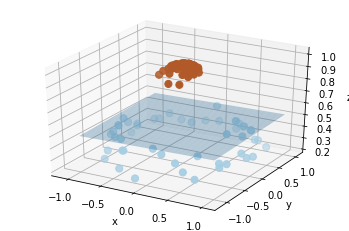

In [63]:
# 数据映射
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap=plt.cm.Paired)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

x_1, y_1 = np.meshgrid(np.linspace(-1, 1), np.linspace(-1, 1))
z =  0.01*x_1 + 0.01*y_1 + 0.5
ax.plot_surface(x_1, y_1, z, alpha=0.3)

在 SVC 中，我们可以用高斯核函数来实现这以功能：kernel='rbf'



/home/crj/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


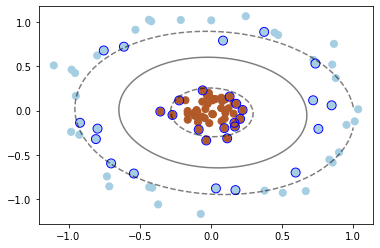

In [65]:
# 画图
X, y = make_circles(100, factor=.1, noise=.1, random_state=2019)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)


ax = plt.gca()
x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
x_1, y_1 = np.meshgrid(x, y)
P = np.zeros_like(x_1)
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        P[i, j] = clf.decision_function(np.array([[xi, yj]]))
ax.contour(x_1, y_1, P, colors='k', levels=[-1, 0, 0.9], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolor='b',
            s=80, facecolors='none');

## 参考
[【机器学习】支持向量机 SVM（非常详细）](https://zhuanlan.zhihu.com/p/77750026)